# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가를 위한 데이터셋을 제공(feeding)하기 위한 모듈
   - raw dataset 에서 입력을 위한 **전처리**, **배치 크키**, **shuffling**등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태, 어떤 처리를 하는지에 따라 다양한 하위클래스들이 제공된다.

## Dataset API 사용
1. **Dataset 생성**
    - raw dataset을 지정 (Loading)
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스등를 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - **from_tensor_slices()**: 메모리의 리스트, 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.

2. **제공 데이터 전처리**
    - **map(함수)**: Dataset이 제공하는 원소를 처리해서 변환된 원소를 제공하도록 한다.
        - 함수: 원소를 어떻게 변환할 지 정의한 함수를 매개변수로 전달한다.
            - 매개변수: Dataset이 제공하는 원소를 받을 변수. 
            - 반환값: Dataset이 제공한 원소를 변경처리한 값.
    - **filter(함수)**: Dataset이 제공하는 원소중 특정 조건을 만족하는(True)인 원소들만 제공한다.
        - 함수: 원소가 특정조건을 만족하는지 여부를 확인하는 로직을 정의한 함수를 매개변수로 전달한다.
            - 매개변수: Dataset이 제공하는 원소를 받을 변수.
            - 반환값: Dataset이 제공한 원소가 특정조건을 만족하는지 여부(bool)

3. **데이터 제공 설정 관련**
    - **batch(size)**: 학습/평가시 한번에 제공할 batch size 지정
        - size: int. batch size 지정
        - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
    - **shuffle(buffer 크기)**: dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int. buffer 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
    - **repeat(count)**: 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다. (에폭단위)
        

- 각 tf.data 함수들은 각 기능에 맞게 데이터를 처리하는 Dataset 객체를 반환한다.

### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.

In [1]:
import tensorflow as tf
import numpy as np

##### Tensor Type
>- TensorFlow의 기본 data 자료구조.
>- numpy가 ndarray를 이용해 데이터를 관리하듯이 tensorflow를 Tensor를 이용해 데이터를 관리한다.
>    - Tesorflow의 모델이 학습, 평가할때 사용하는 데이터셋(train dataset, validation dataset, test dataset)은 tf.Tensor 타입이어야 한다.
>        - 학습/평가(model.fit(), model.evaluate()) 할때 ndarray를 입력 데이터셋으로 넣어주면 내부적으로 tf.Tensor로 변형해서 처리.
>        - tf.Tensor는 데이터셋을 ndarray로 가지고 있다.

In [2]:
t = tf.constant([1, 2, 3], dtype='float32')
t

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [3]:
t.shape, t.dtype

(TensorShape([3]), tf.float32)

In [4]:
# Tensor -> ndarray로 변환
a = t.numpy()
a

array([1., 2., 3.], dtype=float32)

In [5]:
# ndarray/list => Tensor
tf.constant(np.arange(10))

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [6]:
tf.convert_to_tensor(a)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

## Dataset 예제

In [7]:
# 0 ~ 9 정수 -> input data
raw_data1 = np.arange(10)
raw_data1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# DataSet을 생성 -> 대상 raw dataset 메모리에 있는 ndarray일때,
dataset = tf.data.Dataset.from_tensor_slices(raw_data1) # ndarray 데이터셋을 Dataset 파이프라인으로 읽어오는 역할
print(type(dataset))

<class 'tensorflow.python.data.ops.from_tensor_slices_op.TensorSliceDataset'>


In [9]:
# Dataset -> Iterable 타입 => for in
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [10]:
for data in dataset.take(3): # dataset에서 3개만 조회
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [11]:
raw_data2 = np.arange(10, 20)
print(raw_data1, len(raw_data1))
print(raw_data2, len(raw_data2))

[0 1 2 3 4 5 6 7 8 9] 10
[10 11 12 13 14 15 16 17 18 19] 10


##### x, y 묶어서 제공
- 두개 이상의 데이터셋을 묶어서 제공할 경우 Tuple로 묶어준다.
    - Dataset이 feeding 할 때는 같은 index의 값들을 tuple로 묶어서 제공 (zip()과 동일)

In [12]:
dataset2 =  tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2))
for data in dataset2.take(1): # 두 dataset(raw_data1, raw_data2)의 같은 index의 값들을 묶어서 튜플로 반환
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)


In [13]:
for x, y in dataset2:
    print(x, y, sep="=============")

tf.Tensor(0, shape=(), dtype=int32)=============tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)=============tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)=============tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)=============tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)=============tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)=============tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)=============tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)=============tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)=============tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)=============tf.Tensor(19, shape=(), dtype=int32)


##### shuffle
- 데이터셋을 섞는다.

In [14]:
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [15]:
raw_data1 = np.arange(10)
dataset = tf.data.Dataset.from_tensor_slices(raw_data1)
dataset3 = dataset.shuffle(10) # 데이터를 섞어준다. 데이터셋을 처음 읽을 때 한번 섞는다.
print(type(dataset3))

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>


In [16]:
for data in dataset3:
    print(data)

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


##### batch
- drop_remainder: boolean(기본-False)
    - batch로 제공할 데이터의 개수가 설정한 batch_size 보다 적으면 제공하지 않는다.
    - Train dataset을 만들때 True로 설정하여 항상 일정한 batch size로 학습할 수 있도록 한다. drop 되는 데이터는 다른 epoch을 반복할 때 사용된다.

In [17]:
dataset4 = dataset.batch(5)  # batch size 설정 -> 한번에 지정한 개수만큼 제공
print(type(dataset4))
for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int32)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int32)


In [18]:
dataset5 = dataset.batch(3) # 읽어올 데이터의 개수가 batch_size보다 적으면 제공하지 않는다. => train dataset 생성할때 설정.
for data in dataset5:
    print(data)

tf.Tensor([0 1 2], shape=(3,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 8], shape=(3,), dtype=int32)
tf.Tensor([9], shape=(1,), dtype=int32)


In [19]:
dataset5 = dataset.batch(3, drop_remainder=True) # drop_remainder를 통해 마지막꺼는 없애기 ->현재 epoch에서만 안쓰는 것 -> 다음 epoch에서는 shuffle을 진행하기 때문
for data in dataset5:
    print(data)

tf.Tensor([0 1 2], shape=(3,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 8], shape=(3,), dtype=int32)


##### repeat

In [20]:
dataset6 = dataset.repeat(2) # 지정한 횟수만큼 데이터를 반복해서 제공한다. (default: 1 -한번)
print(type(dataset6))
for data in dataset6:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [21]:
# 데이터셋을 반복할때 마다 shuffle
dataset7 = tf.data.Dataset.from_tensor_slices(raw_data1).shuffle(10).batch(3).repeat(3)
for data in dataset7:
    print(data)

tf.Tensor([9 6 1], shape=(3,), dtype=int32)
tf.Tensor([5 4 0], shape=(3,), dtype=int32)
tf.Tensor([7 8 2], shape=(3,), dtype=int32)
tf.Tensor([3], shape=(1,), dtype=int32)
tf.Tensor([1 3 0], shape=(3,), dtype=int32)
tf.Tensor([2 7 4], shape=(3,), dtype=int32)
tf.Tensor([5 8 6], shape=(3,), dtype=int32)
tf.Tensor([9], shape=(1,), dtype=int32)
tf.Tensor([5 9 0], shape=(3,), dtype=int32)
tf.Tensor([7 1 8], shape=(3,), dtype=int32)
tf.Tensor([4 6 3], shape=(3,), dtype=int32)
tf.Tensor([2], shape=(1,), dtype=int32)


##### map

In [22]:
dataset8 = dataset.map(lambda x: x * 2) # map(함수)
print(type(dataset8))
for data in dataset8:
    print(data)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)


In [23]:
for x, y in dataset2:
    print(x, y)

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32) tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32) tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32) tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) tf.Tensor(19, shape=(), dtype=int32)


In [24]:
# 두개의 dataset(x, y)를 묶은 Dataset 객체
def map_func(x, y):
    return x**2, y+10 # X는 제곱, y는 그대로 반환

dataset9 = dataset2.map(map_func)
for x, y in dataset9:
    print(x, y)

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(22, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) tf.Tensor(23, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32) tf.Tensor(24, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32) tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32) tf.Tensor(26, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32) tf.Tensor(27, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32) tf.Tensor(28, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32) tf.Tensor(29, shape=(), dtype=int32)


##### filter

In [25]:
def filter_func(x):
    return x % 2 == 0 

dataset11 = dataset.filter(filter_func)
print(type(dataset11))
for data in dataset11:
    print(data)

<class 'tensorflow.python.data.ops.filter_op.FilterDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


# 문제 유형별 MLP 네트워크
- MLP(Multi Layer Perceptron), ANN(Artificial Neural Network), DNN (Deep Neural Network)
    - Fully Connected Layer로 구성된 네트워크

In [26]:
!pip install scikit-learn --upgrade

# Regression(회귀)

## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import random

In [28]:
# random seed 값 설정
tf.random.set_seed(0)
np.random.seed(0)
random.seed(0)

##### 데이터 로딩

In [29]:
(train_X, y_train), (test_X, y_test) = keras.datasets.boston_housing.load_data()
print(train_X.shape, y_train.shape)
print(test_X.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [30]:
print(train_X[0])
print(y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


##### 하이퍼파라미터, 변수 정의

In [31]:
# 하이퍼파리미터 변수

LEARNING_RATE = 0.001 # 학습율 => 경사하강법에서 구한 gradient(경사-미분계수)에 곱해주는 값으로 0 ~ 1 사이 실수를 지정한다.
N_EPOCH = 200 # 에폭수
N_BATCH = 400 # Train 배치사이즈
N_BATCH_VAL = 50 # Validation/ evaluation 배치 사이즈 => 교차검증 폴더 데이터 수

##### X, y 전처리
- MLP는 선형모델을 기반으로 하므로 Feature scaling을 해준다.

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

In [33]:
X_train.mean(), X_train.std()

(2.6016254395785847e-15, 0.9999999999999993)

##### Dataset 생성

- validation/test set의 pipe line은 동일하게 구성한다.
- train dataset은 shuffle을 추가하고 batch에 drop_remainder=True를 설정한다.
- map, filter 를 pipe line에 추가할 경우 train/validation/test set에 모두 동일하게 적용한다.

In [34]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(X_train.shape[0])\
                               .batch(N_BATCH, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCH_VAL)
# test/validation set은 1. shuffle 안한다. (평균결과로 평가하기 때문에) 
#                       2. batch->drop_remainder=False(기본)으로 설정.

In [36]:
print('epoch당 step수:', len(train_dataset))
print('epoch당 step수:', len(test_dataset))

epoch당 step수: 1
epoch당 step수: 3


> - X_train 404개 -> 400개(N_BATCH)   --> 1 step
> - X_test 102개 -> 50개 (N_BATCH_VAL) --> 3 step (drop remainder를 안했기 때문)

##### 모델 구현

1. 모델 객체 생성 - Sequential
2. 모델에 Layer들 추가
    - Input Layer 추가
        - 입력 데이터의 shape을 지정한다.
        1. InputLayer 객체를 생성해서 추가한다.
        2. 첫번째 Hidden Layer에 input_shape 매개변수에 shape을 지정하여 추가한다.
    - Hidden Layer들 추가
        - Layer의 개수와 Layer의 Unit의 개수는 튜닝대상으로 성능에 영향을 준다.
        - 활성함수는 ReLU 를 사용한다.
        - Layer의 개수와 Unit 개수가 많을 수록 복잡한 모델, 적을 수록 단순한 모델이 된다.
    - Output Layer 추가
        - 풀려는 문제에 따라 unit개수와 활성함수를 지정한다.

In [37]:
def get_model_boston(lr=0.01):
    model = keras.Sequential()
    # 첫번째 hidden layer에 input shape을 지정하고 inputlayer 추가를 생략
    # activation 함수 Layer(layer.ReLU())는 Dense Layer 생성시 activation 속성에 추가 가능.
    model.add(layers.Dense(units=32, activation='relu', input_shape=(13, )))
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    
    # 회귀 output layer: unit 개수-예측하려는 값의 개수.
    #                    확성함수 - 보통: None, 값의 범위를 맞추기 위해 logistic함수(sigmoid 0~1)나 tanh(-1~1)을 사용할 수 있다.
    # y: 1개(집값의 중위수)
    model.add(layers.Dense(units=1)) # activation: None
    
    # 컴파일
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), # default 값으로 생성된 것을 사용할 경우 문자열로 지정
                 loss = 'mse')
    return model

In [38]:
model_boston = get_model_boston(0.05)
# 딥러닝 모델의 구조 확인
model_boston.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 유닛당 파라미터(weight, bias) 개수
# 입력 feature개수(weight 수) + 1(bias)

# 첫번째 layer의 파라미터 수
# 입력 feature: 13 (input_shape), units: 32
(13 + 1)*32

448

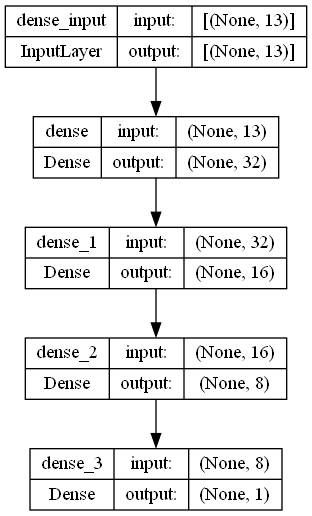

In [40]:
keras.utils.plot_model(model_boston, show_shapes= True)

##### 학습(Train)

In [41]:
# train_dataset 생성 -> X, y를 제공
hist = model_boston.fit(train_dataset, # (X_train, y_train) + shuffle + batch_size
                        epochs=N_EPOCH,
                        validation_data=test_dataset  # Dataset을 이용할 경우 validation_split(비율)을 사용할 수 없다.
                       )

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 592.7670 - val_loss: 580.1001
Epoch 2/200
1/1 [==============================] - 0s 50ms/step - loss: 550.8569 - val_loss: 508.6761
Epoch 3/200
1/1 [==============================] - 0s 48ms/step - loss: 483.9639 - val_loss: 387.6573
Epoch 4/200
1/1 [==============================] - 0s 48ms/step - loss: 365.3210 - val_loss: 233.4769
Epoch 5/200
1/1 [==============================] - 0s 44ms/step - loss: 219.1901 - val_loss: 143.1757
Epoch 6/200
1/1 [==============================] - 0s 49ms/step - loss: 146.6472 - val_loss: 199.8324
Epoch 7/200
1/1 [==============================] - 0s 44ms/step - loss: 207.8450 - val_loss: 148.0499
Epoch 8/200
1/1 [==============================] - 0s 49ms/step - loss: 149.4390 - val_loss: 83.5837
Epoch 9/200
1/1 [==============================] - 0s 47ms/step - loss: 81.3311 - val_loss: 66.5223
Epoch 10/200
1/1 [==============================] - 0s 50ms/step - loss: 57.9749 - val_

1/1 [==============================] - 0s 38ms/step - loss: 7.8004 - val_loss: 21.4785
Epoch 83/200
1/1 [==============================] - 0s 39ms/step - loss: 7.6829 - val_loss: 21.1536
Epoch 84/200
1/1 [==============================] - 0s 39ms/step - loss: 7.6942 - val_loss: 20.8359
Epoch 85/200
1/1 [==============================] - 0s 40ms/step - loss: 7.6696 - val_loss: 20.5646
Epoch 86/200
1/1 [==============================] - 0s 43ms/step - loss: 7.5914 - val_loss: 20.3230
Epoch 87/200
1/1 [==============================] - 0s 53ms/step - loss: 7.5314 - val_loss: 20.1107
Epoch 88/200
1/1 [==============================] - 0s 47ms/step - loss: 7.5308 - val_loss: 19.9379
Epoch 89/200
1/1 [==============================] - 0s 45ms/step - loss: 7.4825 - val_loss: 19.7671
Epoch 90/200
1/1 [==============================] - 0s 46ms/step - loss: 7.3693 - val_loss: 19.5718
Epoch 91/200
1/1 [==============================] - 0s 47ms/step - loss: 7.2936 - val_loss: 19.4154
Epoch 92/200


1/1 [==============================] - 0s 52ms/step - loss: 4.5437 - val_loss: 13.6443
Epoch 164/200
1/1 [==============================] - 0s 53ms/step - loss: 4.4994 - val_loss: 13.4445
Epoch 165/200
1/1 [==============================] - 0s 44ms/step - loss: 4.5070 - val_loss: 13.3231
Epoch 166/200
1/1 [==============================] - 0s 41ms/step - loss: 4.4396 - val_loss: 13.3310
Epoch 167/200
1/1 [==============================] - 0s 49ms/step - loss: 4.4646 - val_loss: 13.3344
Epoch 168/200
1/1 [==============================] - 0s 48ms/step - loss: 4.4478 - val_loss: 13.2811
Epoch 169/200
1/1 [==============================] - 0s 41ms/step - loss: 4.4364 - val_loss: 13.2616
Epoch 170/200
1/1 [==============================] - 0s 42ms/step - loss: 4.4128 - val_loss: 13.1946
Epoch 171/200
1/1 [==============================] - 0s 38ms/step - loss: 4.3758 - val_loss: 13.1244
Epoch 172/200
1/1 [==============================] - 0s 42ms/step - loss: 4.3769 - val_loss: 13.1255
Epoc

##### 결과 시각화
- 학습 시 epoch별 검증 결과를 시각화한다.

In [42]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

- learning rate 0.001, epoch 200 으로 했을 때
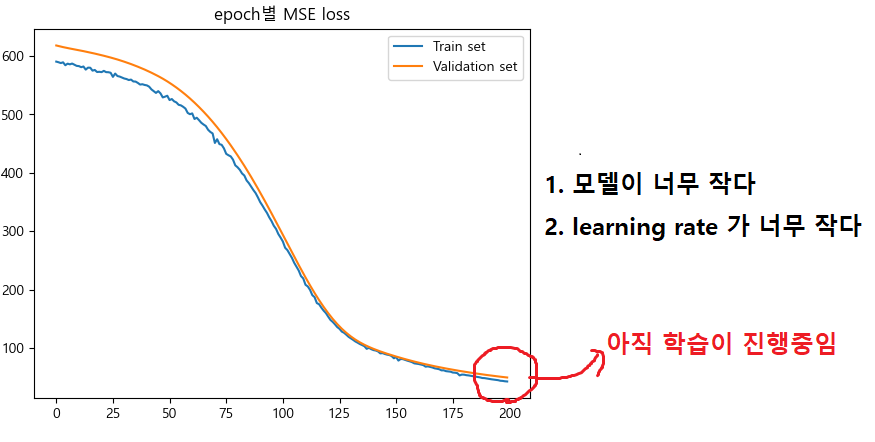
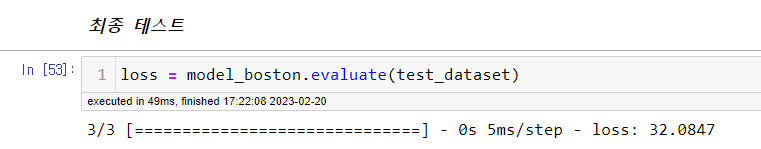

- learning rate 0.01, epoch 200 으로 했을 때
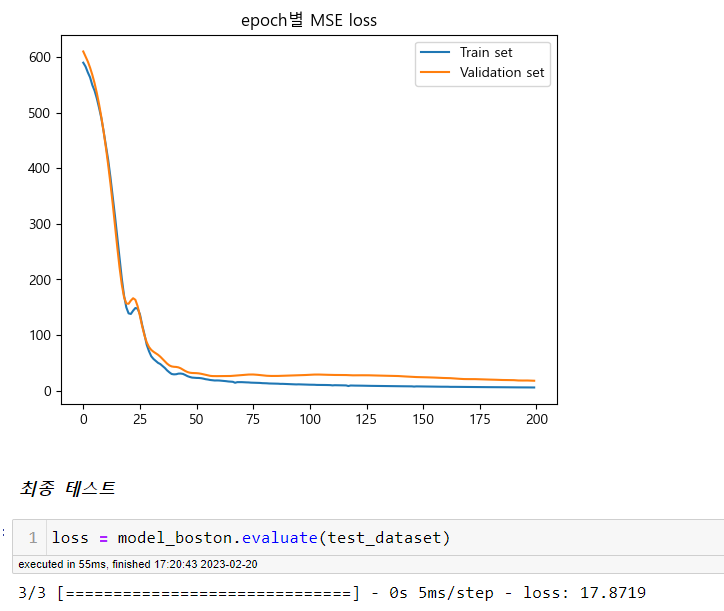

- learning rate 0.05, epoch 200

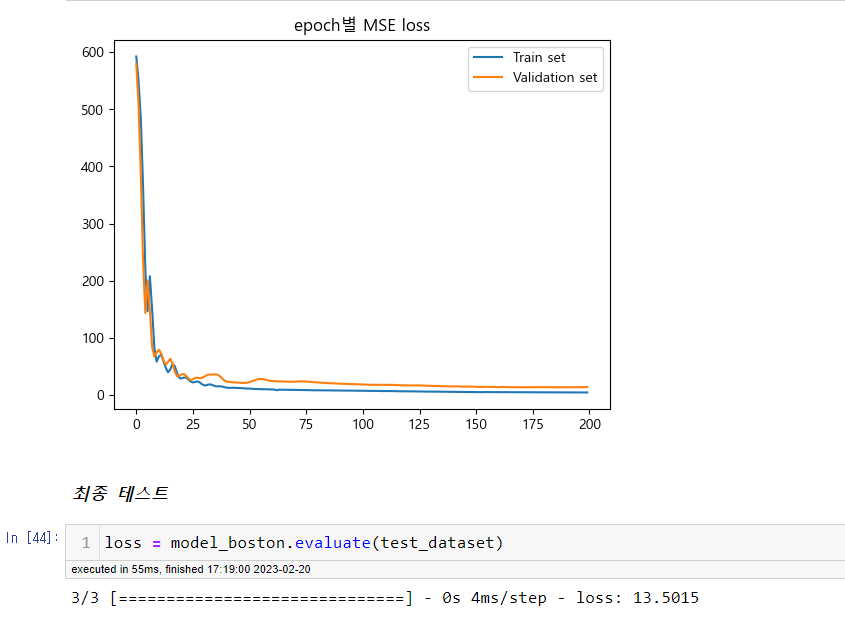

- learning rate 0.1, epoch 200
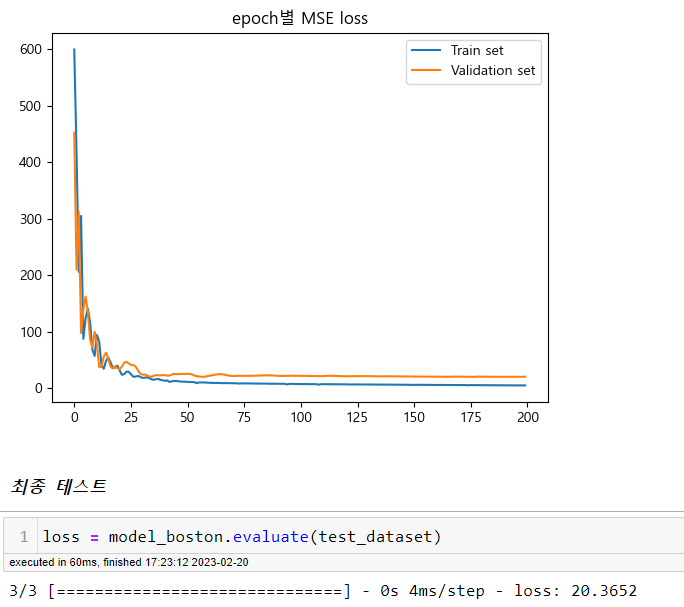

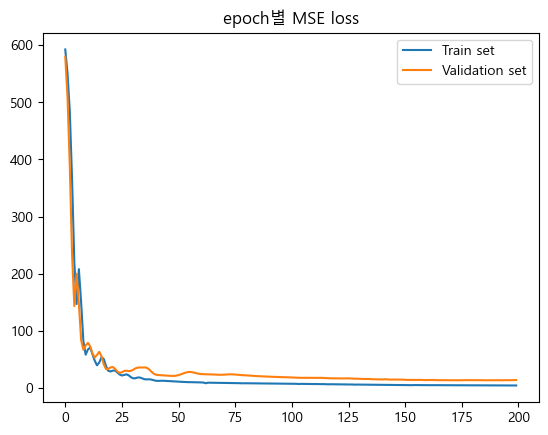

In [43]:
# hist.history : epoch별 검증 결과
# hist.epoch : epoch 리스트
plt.plot(hist.epoch, hist.history['loss'], label = 'Train set')
plt.plot(hist.epoch, hist.history['val_loss'], label = 'Validation set')

plt.title('epoch별 MSE loss')
plt.legend()
plt.show()

##### 최종 테스트

In [44]:
loss = model_boston.evaluate(test_dataset)

3/3 [==============================] - 0s 7ms/step - loss: 13.5015


##### 모델 네트워크 저장

In [82]:
import os
path = 'saved_model'
os.makedirs(path, exist_ok=True)

In [84]:
saved_dir = os.path.join(path, 'boston_model')
print(saved_dir)
model_boston.save(saved_dir)

saved_model\boston_model


INFO:tensorflow:Assets written to: saved_model\boston_model\assets


INFO:tensorflow:Assets written to: saved_model\boston_model\assets


##### 새로운 데이터 추론

In [86]:
# 저장된 모델을 불러와서 추론
saved_model = keras.models.load_model(saved_dir)
saved_model.evaluate(test_dataset)

3/3 [==============================] - 0s 4ms/step - loss: 20.6145


20.614477157592773

In [87]:
X_new = X_test[:5]
pred = saved_model.predict(X_new)
print(pred)

1/1 [==============================] - 0s 188ms/step
[[ 8.407684]
 [17.412659]
 [22.013771]
 [31.677612]
 [26.27795 ]]


In [88]:
y_test[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, modelzerss, optimi

import numpy as np
import matplotlib.pyplot as plt

import os
import random

# seed 값 설정
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)


In [54]:
class_names = np.array(['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

##### Data 로딩

In [55]:
(train_image, y_train), (test_image, y_test) = keras.datasets.fashion_mnist.load_data()
train_image.shape, y_train.shape, test_image.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [56]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

##### validatation dataset set  분리
- Train set을 Train/validation set으로 분리

In [57]:
from sklearn.model_selection import train_test_split
train_image, val_image, y_train, y_val = train_test_split(train_image, y_train, test_size=0.2, stratify=y_train, random_state=0)

##### 이미지 확인

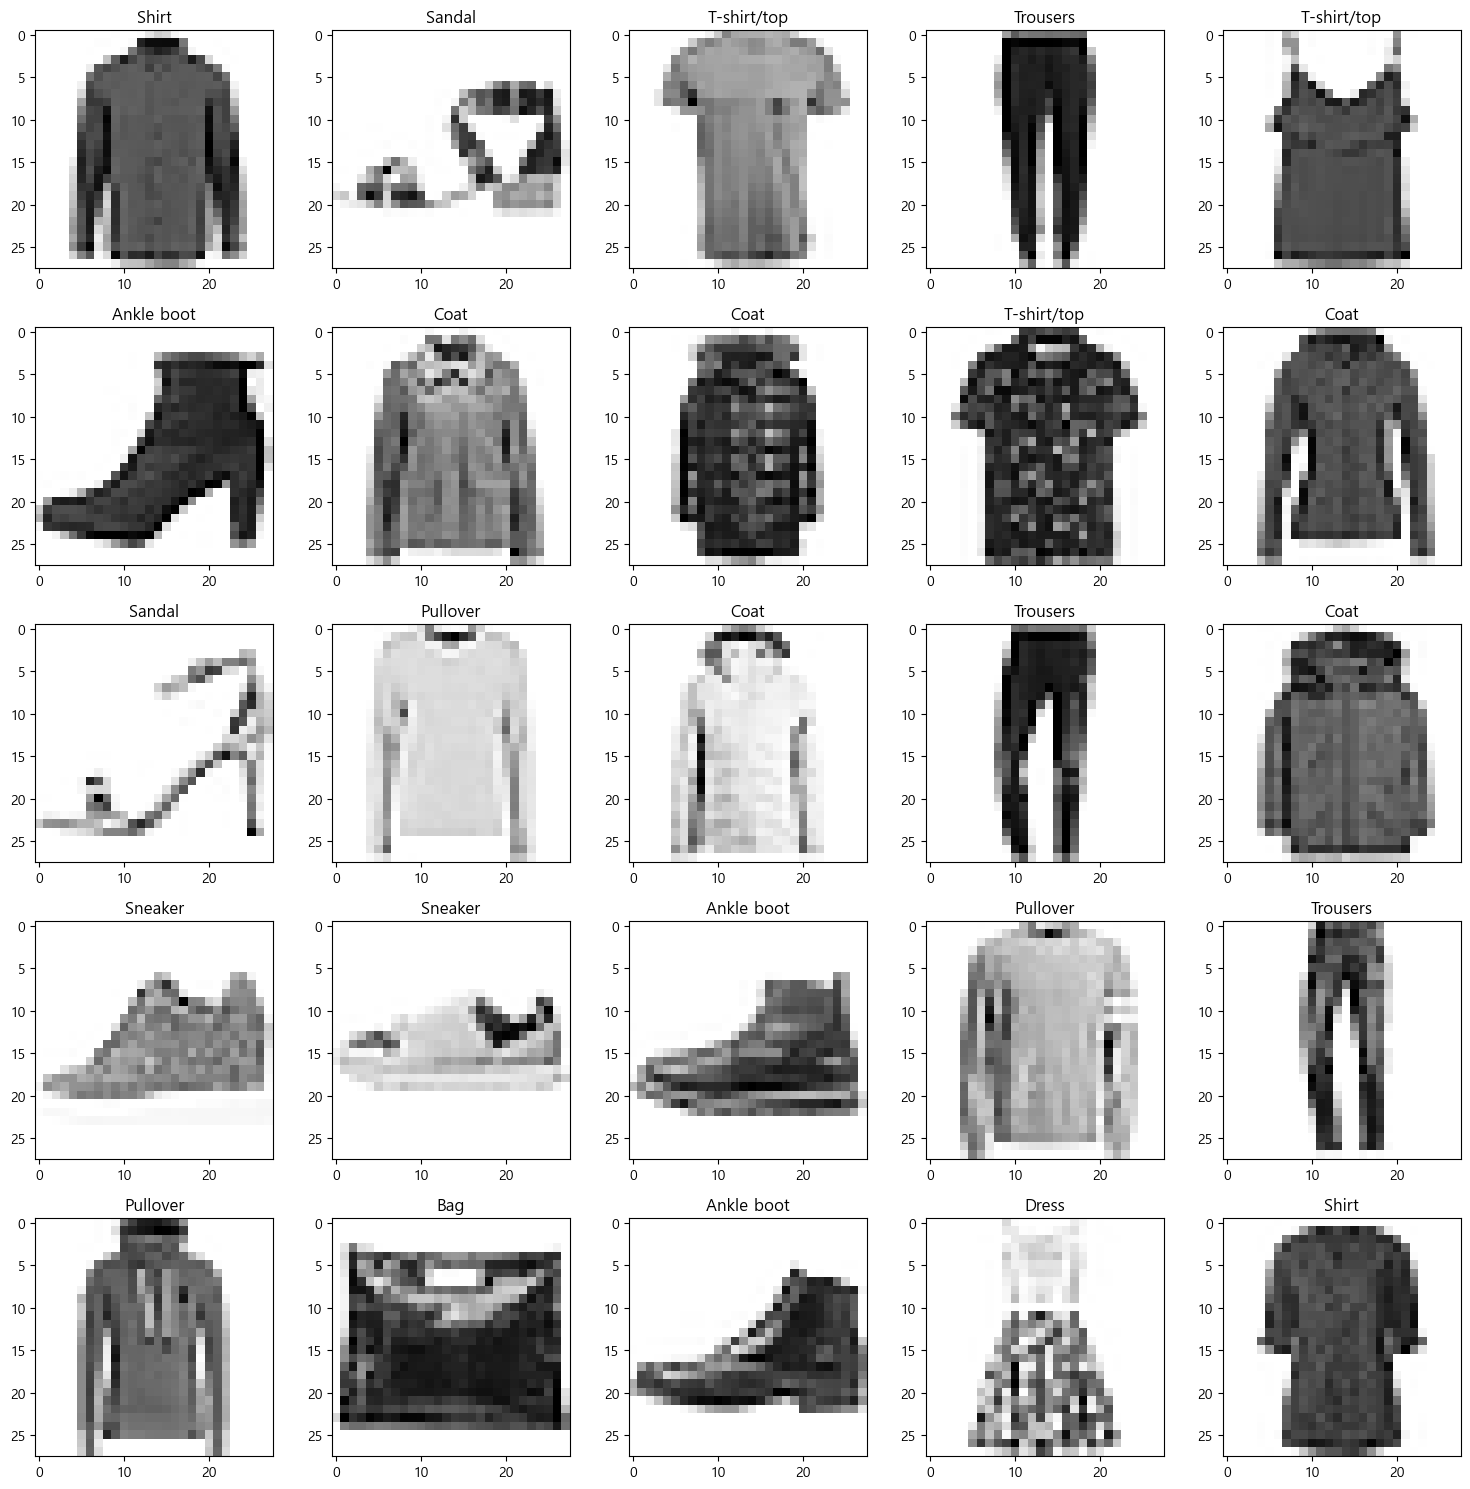

In [59]:
cnt = 25  # 확인할 이미지개수 (5배수)
plt.figure(figsize=(15, 15))
for i in range(cnt):
    plt.subplot(5, int(cnt/5), i+1)
    plt.imshow(train_image[i], cmap='Greys') # gray: 0-black, 255: white / Greys: 0-white 255 black
    label = class_names[y_train[i]]
    plt.title(label)
    
plt.tight_layout()
plt.show()

#### 하이퍼파라미터, 변수 설정

In [60]:
LEARNING_RATE = 0.001     # 학습률
N_EPOCH = 100             # 에폭수
N_BATCH = 1000            # 배치 사이즈

#### X, y  전처리
- y값 처리
    1. 다중 분류에서 label encoding 형식의 label을 one hot encoding 처리 ==> loss: categorical_crossentropy)
    2. label encoding 형식의 label을 그대로 모델에 전달 -> loss = sparse_categorical_crossentropy
        - one hot encoding 처리를 loss가 대신한다.

In [ ]:
# 2번 방식을 사용. (y를 그대로 유지)

- x값(이미지) 처리
    - dtype을 uint8에서 float32로 변환한다.
    - 0 ~ 1 정규화. X/255.0으로 나눈다.

In [62]:
X_train = train_image.astype('float32')/255.0
X_val = val_image.astype('float32')/255.0
X_test = test_image.astype('float32')/255.0

In [63]:
print(train_image.min(), train_image.max())
print(X_train.min(), X_train.max())

0 255
0.0 1.0


##### Dataset 생성

In [70]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(X_train.shape[0]).batch(N_BATCH, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(N_BATCH)
test_dataset =  tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCH)

In [71]:
# epoch 당 step 수 계산
len(train_dataset), len(val_dataset), len(test_dataset)

(48, 12, 10)

##### 모델 생성 및 컴파일

In [73]:
X_train.reshape(-1, 784).shape # flatten

(48000, 784)

In [74]:
def get_model_fashion(lr=0.01):
    model = keras.Sequential()
    # Hidden layer (첫번째 hidden layer에 input shape를 지정)
    model.add(layers.Flatten(input_shape=(28, 28))) # 28 x 28 2차원배열 => 784, 1차원 배열로 flatten
    
    # Dense Layer의 Unit 개수는 점점 줄여나가는 패턴을 사용
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    
    # output layer
    # 다중분류 : unit수 - y의 class개수, activation: softmax -> 각 출력값이 class별 확률이 되도록 처리
    model.add(layers.Dense(10, activation='softmax', name="output"))
    
    # 컴파일
    # 다중분류 loss 함수: 
#                         y가 one hot encoding이 안된 경우: sparse_categorical_crossentropy
#                         y를 one hot encoding 한 경우 categorical_crossentropy
    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                 loss='sparse_categorical_crossentropy',
                 metrics='accuracy' 
                 )
    return model

In [75]:
model_fashion = get_model_fashion(LEARNING_RATE)
model_fashion.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-tr

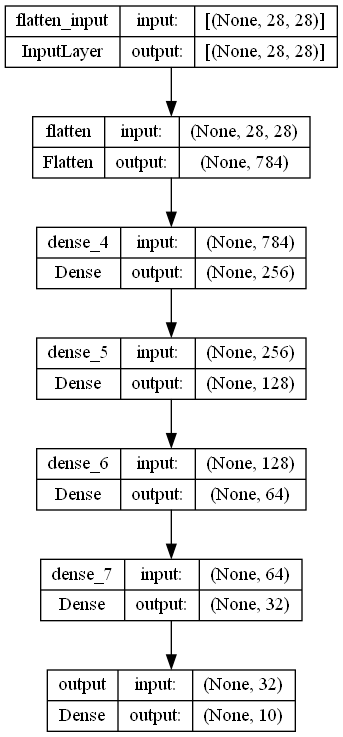

In [76]:
keras.utils.plot_model(model_fashion, show_shapes=True)

##### Train(학습)

In [77]:
hist = model_fashion.fit(train_dataset, epochs=N_EPOCH, validation_data=val_dataset)

Epoch 1/100
48/48 [==============================] - 3s 26ms/step - loss: 1.0089 - accuracy: 0.6733 - val_loss: 0.6062 - val_accuracy: 0.7993
Epoch 2/100
48/48 [==============================] - 1s 22ms/step - loss: 0.5186 - accuracy: 0.8238 - val_loss: 0.4650 - val_accuracy: 0.8356
Epoch 3/100
48/48 [==============================] - 1s 22ms/step - loss: 0.4411 - accuracy: 0.8450 - val_loss: 0.4527 - val_accuracy: 0.8355
Epoch 4/100
48/48 [==============================] - 1s 22ms/step - loss: 0.4049 - accuracy: 0.8576 - val_loss: 0.4026 - val_accuracy: 0.8545
Epoch 5/100
48/48 [==============================] - 1s 28ms/step - loss: 0.3791 - accuracy: 0.8660 - val_loss: 0.3774 - val_accuracy: 0.8655
Epoch 6/100
48/48 [==============================] - 1s 24ms/step - loss: 0.3558 - accuracy: 0.8744 - val_loss: 0.3814 - val_accuracy: 0.8602
Epoch 7/100
48/48 [==============================] - 1s 22ms/step - loss: 0.3449 - accuracy: 0.8764 - val_loss: 0.3534 - val_accuracy: 0.8714
Epoch 

48/48 [==============================] - 1s 21ms/step - loss: 0.0887 - accuracy: 0.9681 - val_loss: 0.4390 - val_accuracy: 0.8928
Epoch 59/100
48/48 [==============================] - 1s 20ms/step - loss: 0.0926 - accuracy: 0.9663 - val_loss: 0.4132 - val_accuracy: 0.8940
Epoch 60/100
48/48 [==============================] - 1s 20ms/step - loss: 0.0915 - accuracy: 0.9660 - val_loss: 0.4314 - val_accuracy: 0.8929
Epoch 61/100
48/48 [==============================] - 1s 20ms/step - loss: 0.0866 - accuracy: 0.9689 - val_loss: 0.4384 - val_accuracy: 0.8873
Epoch 62/100
48/48 [==============================] - 1s 21ms/step - loss: 0.0793 - accuracy: 0.9718 - val_loss: 0.4380 - val_accuracy: 0.8929
Epoch 63/100
48/48 [==============================] - 1s 21ms/step - loss: 0.0846 - accuracy: 0.9691 - val_loss: 0.4319 - val_accuracy: 0.8942
Epoch 64/100
48/48 [==============================] - 1s 22ms/step - loss: 0.0821 - accuracy: 0.9704 - val_loss: 0.4483 - val_accuracy: 0.8955
Epoch 65/100

##### 결과 시각화
- 학습 시 epoch별 검증 결과를 시각화한다.

In [79]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

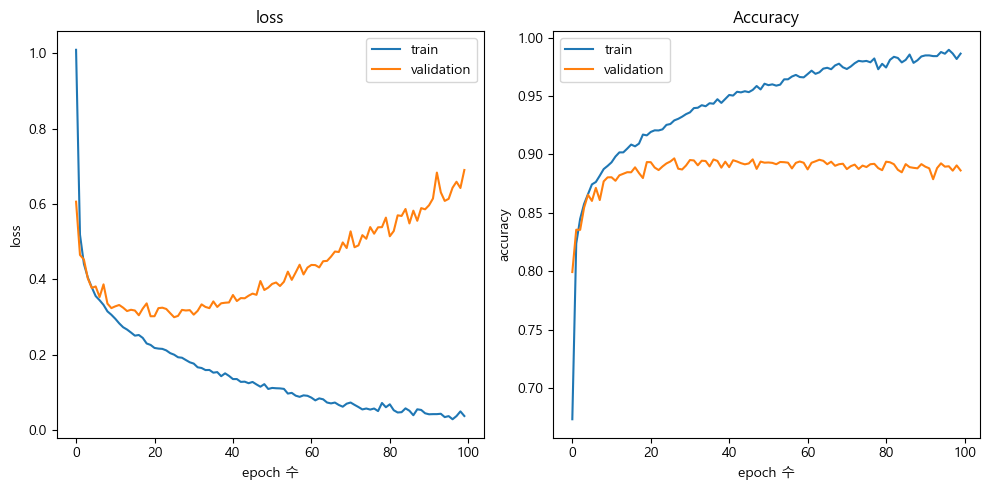

In [82]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.epoch, hist.history['loss'], label='train')
plt.plot(hist.epoch, hist.history['val_loss'], label = 'validation')
plt.title('loss')
plt.xlabel('epoch 수')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, hist.history['accuracy'], label='train')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('epoch 수')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

- 괜찮은 결과 값 자세히 확인하기

In [83]:
model_fashion2 = get_model_fashion(LEARNING_RATE)

hist = model_fashion2.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
48/48 [==============================] - 3s 25ms/step - loss: 0.9032 - accuracy: 0.6927 - val_loss: 0.5605 - val_accuracy: 0.7962
Epoch 2/20
48/48 [==============================] - 1s 21ms/step - loss: 0.4964 - accuracy: 0.8268 - val_loss: 0.4524 - val_accuracy: 0.8360
Epoch 3/20
48/48 [==============================] - 1s 20ms/step - loss: 0.4324 - accuracy: 0.8502 - val_loss: 0.4277 - val_accuracy: 0.8447
Epoch 4/20
48/48 [==============================] - 1s 21ms/step - loss: 0.3993 - accuracy: 0.8602 - val_loss: 0.3924 - val_accuracy: 0.8583
Epoch 5/20
48/48 [==============================] - 1s 21ms/step - loss: 0.3678 - accuracy: 0.8702 - val_loss: 0.3767 - val_accuracy: 0.8645
Epoch 6/20
48/48 [==============================] - 1s 21ms/step - loss: 0.3516 - accuracy: 0.8744 - val_loss: 0.3579 - val_accuracy: 0.8688
Epoch 7/20
48/48 [==============================] - 1s 20ms/step - loss: 0.3338 - accuracy: 0.8807 - val_loss: 0.3445 - val_accuracy: 0.8759
Epoch 8/20
48

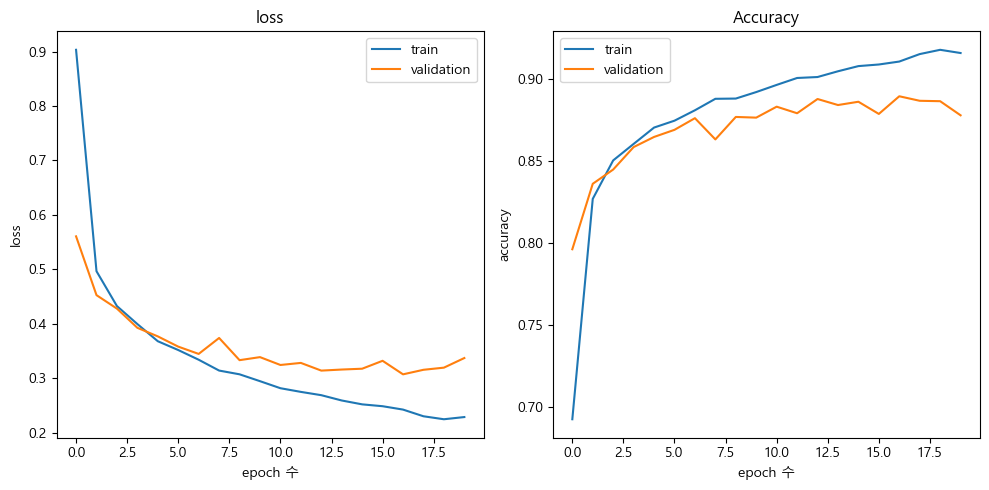

In [84]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.epoch, hist.history['loss'], label='train')
plt.plot(hist.epoch, hist.history['val_loss'], label = 'validation')
plt.title('loss')
plt.xlabel('epoch 수')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, hist.history['accuracy'], label='train')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('epoch 수')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### 최종평가

In [85]:
# test set
loss, acc = model_fashion2.evaluate(test_dataset)

10/10 [==============================] - 0s 11ms/step - loss: 0.3709 - accuracy: 0.8690


In [86]:
print(loss, acc, sep=' , ')

0.3709110617637634 , 0.8690000176429749


#### 모델저장

In [87]:
save_dir_fashion = 'saved_model/fashion_mnist_model'

In [88]:
model_fashion2.save(save_dir_fashion)

INFO:tensorflow:Assets written to: saved_model/fashion_mnist_model\assets


INFO:tensorflow:Assets written to: saved_model/fashion_mnist_model\assets


#### 새로운 데이터 추론

In [90]:
# 저장된 모델을 loading해서 추론
saved_model_fashion = models.load_model(save_dir_fashion)
saved_model_fashion.evaluate(test_dataset)

10/10 [==============================] - 0s 11ms/step - loss: 0.3709 - accuracy: 0.8690


[0.3709110617637634, 0.8690000176429749]

In [93]:
new_X = X_test[1000:1010]
new_X.shape

(10, 28, 28)

In [94]:
pred = saved_model_fashion.predict(new_X)
pred.shape

1/1 [==============================] - 0s 192ms/step


(10, 10)

In [102]:
# 모델 추론결과에 대한 후처리
label = np.argmax(pred, axis=-1) # label 값을 조회
label_name = class_names[label]
proba = np.max(pred, axis=-1)   # 얼마의 확률로 label을 추론했는지 확률값 조회
label, label_name, proba*100

(array([6, 3, 5, 5, 6, 4, 5, 9, 6, 3], dtype=int64),
 array(['Shirt', 'Dress', 'Sandal', 'Sandal', 'Shirt', 'Coat', 'Sandal',
        'Ankle boot', 'Shirt', 'Dress'], dtype='<U11'),
 array([ 85.329285,  99.985016,  99.95529 , 100.      ,  48.546947,
         37.452072,  99.99987 ,  99.706665,  61.39487 ,  99.48266 ],
       dtype=float32))

In [105]:
for idx, (n, p) in enumerate(zip(label_name, proba), start=1):
    print(f'{idx} {n} - {int(p*100)}%')

1 Shirt - 85%
2 Dress - 99%
3 Sandal - 99%
4 Sandal - 100%
5 Shirt - 48%
6 Coat - 37%
7 Sandal - 99%
8 Ankle boot - 99%
9 Shirt - 61%
10 Dress - 99%


In [106]:
class_names[y_test[1000:1010]]

array(['T-shirt/top', 'Dress', 'Sandal', 'Sandal', 'Shirt', 'T-shirt/top',
       'Sandal', 'Ankle boot', 'Shirt', 'Dress'], dtype='<U11')

## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

- **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현
        - output layer: units=1, activation='sigmoid'
        - loss: binary_crossentropy
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
        - output layer: units=2, activation='softmax', y(정답)은 one hot encoding 처리
        - loss: categorical_crossentropy
        
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [107]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩, train/validation/test set 나누기

In [108]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [109]:
np.unique(y)

array([0, 1])

In [111]:
# Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
# Train / Validation 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

In [112]:
X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

#### 하이퍼파라미터, 변수 정의

In [113]:
LEARNING_RATE = 0.001
N_EPOCH = 200
N_BATCH = 100
N_BATCH_VAL_TEST = 50

#### 데이터 전처리
- y (label) 처리
    - 이진 분류
        - 양성의 확률을 출력하도록 모델을 구성하는 경우 그대로 사용.
        - 양성일 확률, 음성일 확률을 출력하도록 모델을 구성하는 경우(다중분류 방식으로 처리) one hot encoding 처리한다.
- X (feature) 처리
    - 문자열(범주형): one hot encoding
    - 연속형(수치형): feature scaling

In [114]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Dataset 생성


In [116]:
train_size = X_train_scaled.shape[0]
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(train_size).batch(N_BATCH, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCH_VAL_TEST)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCH_VAL_TEST)

#### model 생성, 컴파일

In [119]:
X_train_scaled.shape

(364, 30)

In [121]:
from tensorflow.keras.metrics import Recall, Precision
def get_model_cancer(lr=0.01):
    model = keras.Sequential()
    # Hidden layer
    model.add(layers.Dense(32, activation='relu', input_shape=(30, )))
    model.add(layers.Dense(16, activation='relu'))
    
    # Output layer
    # 이진분류(양성인가?): unit 개수- 1개(positive-양성 - 확률), activation: 'sigmoid'
    model.add(layers.Dense(1, activation='sigmoid', name='output_layer')) # layer이름 규칙: 변수명 규칙과 통일
    
    # 컴파일 - 이진분류의 loss함수: binary_crossentropy
    model.compile(optimizer = optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy', Recall()])
    
    return model

In [122]:
model_cancer = get_model_cancer(LEARNING_RATE)
model_cancer.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                992       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


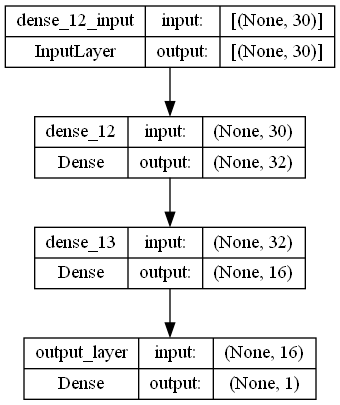

In [123]:
keras.utils.plot_model(model_cancer, show_shapes=True, to_file='model_cancer.png')

#### Train(학습)

In [124]:
hist = model_cancer.fit(train_dataset, epochs=N_EPOCH, validation_data=val_dataset)

Epoch 1/200
3/3 [==============================] - 2s 202ms/step - loss: 0.5983 - accuracy: 0.7333 - recall: 0.8783 - val_loss: 0.5505 - val_accuracy: 0.7692 - val_recall: 0.8596
Epoch 2/200
3/3 [==============================] - 0s 26ms/step - loss: 0.5256 - accuracy: 0.8033 - recall: 0.9000 - val_loss: 0.5011 - val_accuracy: 0.8242 - val_recall: 0.8947
Epoch 3/200
3/3 [==============================] - 0s 25ms/step - loss: 0.4835 - accuracy: 0.8200 - recall: 0.9180 - val_loss: 0.4584 - val_accuracy: 0.8681 - val_recall: 0.9298
Epoch 4/200
3/3 [==============================] - 0s 30ms/step - loss: 0.4224 - accuracy: 0.8733 - recall: 0.9430 - val_loss: 0.4215 - val_accuracy: 0.8681 - val_recall: 0.9298
Epoch 5/200
3/3 [==============================] - 0s 26ms/step - loss: 0.3915 - accuracy: 0.8833 - recall: 0.9471 - val_loss: 0.3881 - val_accuracy: 0.8571 - val_recall: 0.9123
Epoch 6/200
3/3 [==============================] - 0s 24ms/step - loss: 0.3635 - accuracy: 0.8900 - recall: 0

Epoch 47/200
3/3 [==============================] - 0s 30ms/step - loss: 0.0651 - accuracy: 0.9833 - recall: 0.9895 - val_loss: 0.0307 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 48/200
3/3 [==============================] - 0s 25ms/step - loss: 0.0608 - accuracy: 0.9833 - recall: 0.9897 - val_loss: 0.0298 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 49/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0547 - accuracy: 0.9900 - recall: 0.9949 - val_loss: 0.0290 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 50/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0549 - accuracy: 0.9833 - recall: 0.9898 - val_loss: 0.0282 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 51/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0515 - accuracy: 0.9867 - recall: 0.9946 - val_loss: 0.0276 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 52/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0513 - accuracy: 0.9833 - reca

Epoch 93/200
3/3 [==============================] - 0s 25ms/step - loss: 0.0320 - accuracy: 0.9933 - recall: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 94/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0313 - accuracy: 0.9933 - recall: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 95/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0310 - accuracy: 0.9933 - recall: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 96/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0282 - accuracy: 0.9933 - recall: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 97/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 0.9933 - recall: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 98/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0296 - accuracy: 0.9933 - reca

3/3 [==============================] - 0s 24ms/step - loss: 0.0174 - accuracy: 0.9933 - recall: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9890 - val_recall: 1.0000
Epoch 139/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0121 - accuracy: 0.9967 - recall: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9890 - val_recall: 1.0000
Epoch 140/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0159 - accuracy: 0.9933 - recall: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9890 - val_recall: 1.0000
Epoch 141/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0142 - accuracy: 0.9933 - recall: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9890 - val_recall: 1.0000
Epoch 142/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0163 - accuracy: 0.9933 - recall: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9890 - val_recall: 1.0000
Epoch 143/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0148 - accuracy: 0.9933 - recall: 1.00

3/3 [==============================] - 0s 23ms/step - loss: 0.0093 - accuracy: 0.9967 - recall: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9890 - val_recall: 1.0000
Epoch 184/200
3/3 [==============================] - 0s 25ms/step - loss: 0.0074 - accuracy: 0.9967 - recall: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9890 - val_recall: 1.0000
Epoch 185/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0099 - accuracy: 0.9967 - recall: 1.0000 - val_loss: 0.0143 - val_accuracy: 0.9890 - val_recall: 1.0000
Epoch 186/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0093 - accuracy: 0.9967 - recall: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9890 - val_recall: 1.0000
Epoch 187/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0061 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9890 - val_recall: 1.0000
Epoch 188/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0089 - accuracy: 0.9967 - recall: 1.00

#### 결과 시각화

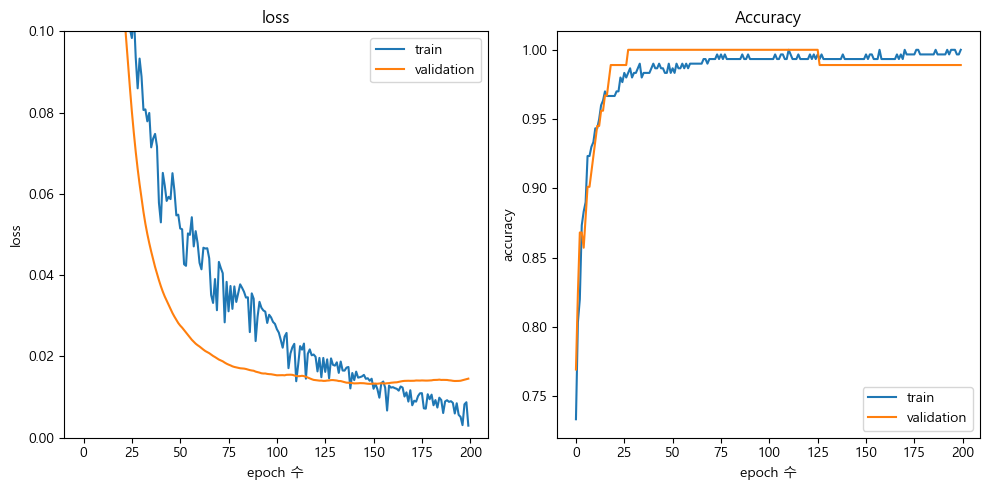

In [128]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.epoch, hist.history['loss'], label='train')
plt.plot(hist.epoch, hist.history['val_loss'], label = 'validation')
plt.title('loss')
plt.ylim(0, 0.1)
plt.xlabel('epoch 수')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, hist.history['accuracy'], label='train')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('epoch 수')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### 최종평가

In [129]:
loss, acc, recall = model_cancer.evaluate(test_dataset)
print(loss, acc, recall)

3/3 [==============================] - 0s 6ms/step - loss: 0.1495 - accuracy: 0.9649 - recall: 0.9861
0.14952515065670013 0.9649122953414917 0.9861111044883728


#### 모델저장

In [130]:
save_dir_path = 'saved_model/cancer_model'

In [131]:
model_cancer.save(save_dir_path)

INFO:tensorflow:Assets written to: saved_model/cancer_model\assets


INFO:tensorflow:Assets written to: saved_model/cancer_model\assets


#### 새로운 데이터 추론

In [132]:
saved_model = get_model_cancer(LEARNING_RATE)
saved_model.evaluate(test_dataset)

3/3 [==============================] - 0s 6ms/step - loss: 0.6476 - accuracy: 0.6316 - recall_1: 1.0000


[0.647607684135437, 0.6315789222717285, 1.0]

In [133]:
np.unique(y_test, return_counts=True)[1]/y_test.size

array([0.36842105, 0.63157895])

In [134]:
saved_model = models.load_model(save_dir_path)
saved_model.evaluate(test_dataset)

3/3 [==============================] - 0s 6ms/step - loss: 0.1495 - accuracy: 0.9649 - recall: 0.9861


[0.14952515065670013, 0.9649122953414917, 0.9861111044883728]

In [135]:
new_X = X_test_scaled[:10]
pred = saved_model.predict(new_X)
pred.shape

1/1 [==============================] - 0s 99ms/step


(10, 1)

In [138]:
print(pred)
print(np.round(pred, 3))

[[2.7873192e-04]
 [2.7264950e-16]
 [2.8394345e-07]
 [9.9997908e-01]
 [2.0943771e-05]
 [9.9809438e-01]
 [6.7332861e-05]
 [9.9990022e-01]
 [9.9999464e-01]
 [1.4204730e-12]]
[[0.   ]
 [0.   ]
 [0.   ]
 [1.   ]
 [0.   ]
 [0.998]
 [0.   ]
 [1.   ]
 [1.   ]
 [0.   ]]


##### 모델출력결과 후처리

In [140]:
np.where(pred >= 0.5, '양성종양 - 1', '악성종양 - 0')

array([['악성종양 - 0'],
       ['악성종양 - 0'],
       ['악성종양 - 0'],
       ['양성종양 - 1'],
       ['악성종양 - 0'],
       ['양성종양 - 1'],
       ['악성종양 - 0'],
       ['양성종양 - 1'],
       ['양성종양 - 1'],
       ['악성종양 - 0']], dtype='<U8')

In [141]:
y_test[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])